# Logistic Regression Model
In this notebook, we will use a logistic regression model trained on our labeled data to predict whether some test data contains suicidal ideology or not, then compare to the actual labels and measure our metrics.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import utils as utils

In [25]:
train_path = '../data/train.csv'
test_path = '../data/test.csv'

In [26]:
df = pd.read_csv(train_path)
df.describe()

,text,label
count,34823,34823
unique,34772,5
top,FEARLESS FRIDAYS MEGA THREAD. Here we discuss ...,self.depression
freq,13,11940


In [27]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['text'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = model.predict(X_test)

In [31]:
average_type = 'weighted'

def get_prfa(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average=average_type)
    recall = recall_score(y_test, y_pred, average=average_type)
    f1 = f1_score(y_test, y_pred, average=average_type)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

precision, recall, f1, accuracy = get_prfa(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.6788551607324312
Recall: 0.6623115577889447
F1 Score: 0.663860584534174
Accuracy: 0.6623115577889447


In [32]:
sample_sentence = "i want to die."
sample_vector = tfidf.transform([sample_sentence])
prediction = model.predict(sample_vector)
print(f"Prediction for '{sample_sentence}': {prediction}")

Prediction for 'i want to die.': ['self.SuicideWatch']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression(max_iter=1000)
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = {'precision': [], 'recall': [], 'f1': [], 'accuracy': []}

for percent in percentages:
    num_samples = int(X_train.shape[0] * percent)
    sub_X = X_train[:num_samples]
    sub_y = y_train[:num_samples]
    
    model.fit(sub_X, sub_y)
    y_pred = model.predict(X_test)

    precision, recall, f1, accuracy = get_prfa(y_test, y_pred)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1'].append(f1)
    results['accuracy'].append(accuracy)

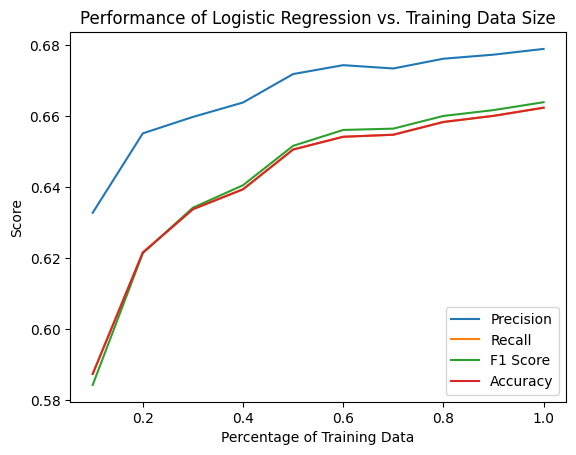

In [38]:
utils.create_graph(percentages, results, 'Logistic Regression', 'LR.png')